# Part 3

**Problem: Does the Complaint Type that you identified in response to Problem 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?**

In [2]:
import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

import folium

import seaborn as sns

print('Libraries Imported')


Libraries Imported


Import 311 NYC dataset:


In [3]:
#https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
path1 = 'data/fhrw-4uyv.csv'

#import only for relevant columns
columns_used1 = ['unique_key', 'created_date', 'complaint_type', 'incident_zip', 'incident_address', 'street_name', 'address_type', 'city', 'resolution_description', 'borough', 'latitude', 'longitude', 'closed_date', 'location_type']

#total number of rows defined as 10 million
df_311 = pd.read_csv(path1, parse_dates = ['created_date'], usecols = columns_used1, nrows=10000000) 
df_311.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
0,2020-10-25 12:36:48,47979046,WATER LEAK,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869648,-73.902030,NaN,RESIDENTIAL BUILDING
1,2020-10-25 15:56:03,47979693,HEAT/HOT WATER,11422.0,148-56 262 PLACE,262 PLACE,ADDRESS,Rosedale,The following complaint conditions are still o...,QUEENS,40.653249,-73.725543,NaN,RESIDENTIAL BUILDING
2,2020-10-25 02:06:31,47977676,HEAT/HOT WATER,10028.0,221 EAST 83 STREET,EAST 83 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.776599,-73.954748,NaN,RESIDENTIAL BUILDING
3,2020-10-25 16:47:11,47979139,HEAT/HOT WATER,11213.0,1689 CARROLL STREET,CARROLL STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.666077,-73.930341,NaN,RESIDENTIAL BUILDING
4,2020-10-25 10:21:45,47978127,HEAT/HOT WATER,11213.0,930 PROSPECT PLACE,PROSPECT PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.674070,-73.945831,NaN,RESIDENTIAL BUILDING


Borough (*BRONX*) already identified that should be focused first:

In [4]:
# keeping only Bronx data
df_311 = df_311[df_311['borough'] == 'BRONX'].reset_index(drop = True)
df_311.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
0,2020-10-25 12:36:48,47979046,WATER LEAK,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869648,-73.902030,NaN,RESIDENTIAL BUILDING
1,2020-10-25 15:17:34,47979698,HEAT/HOT WATER,10454.0,345 CYPRESS AVENUE,CYPRESS AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.808376,-73.913004,NaN,RESIDENTIAL BUILDING
2,2020-10-25 19:50:03,47977659,HEAT/HOT WATER,10467.0,333 EAST MOSHOLU PARKWAY NORTH,EAST MOSHOLU PARKWAY NORTH,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.871678,-73.880333,NaN,RESIDENTIAL BUILDING
3,2020-10-25 22:45:14,47979799,HEAT/HOT WATER,10452.0,120 FEATHERBED LANE,FEATHERBED LANE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.846101,-73.919905,NaN,RESIDENTIAL BUILDING
4,2020-10-25 03:43:29,47978803,PAINT/PLASTER,10457.0,1561 SHERIDAN AVENUE,SHERIDAN AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.842153,-73.911070,NaN,RESIDENTIAL BUILDING


Import PLUTO dataset:

https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip

In [5]:
#https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip
path2 = 'data/PLUTO_for_WEB/BX_18v1.csv'

#import only for relevant columns
columns_used2 = ['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
                 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
                 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']

df_pluto = pd.read_csv(path2, usecols = columns_used2)
df_pluto.head()


,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


In [6]:
df_pluto.dtypes

Lot             int64
ZipCode       float64
Address        object
LotArea         int64
BldgArea        int64
ResArea         int64
OfficeArea      int64
RetailArea      int64
NumBldgs        int64
NumFloors     float64
LotDepth      float64
BldgDepth     float64
YearBuilt       int64
YearAlter1      int64
BuiltFAR      float64
ResidFAR      float64
CommFAR       float64
FacilFAR      float64
XCoord        float64
YCoord        float64
dtype: object

Normalize values:

In [7]:
#not normalizing adress, zip code, latitude or longitude
normalized_columns = ['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                      'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1']

scaler = MinMaxScaler().fit(df_pluto[normalized_columns])
df_pluto[normalized_columns] = scaler.transform(df_pluto[normalized_columns])
df_pluto.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,0.000000,10454.0,122 BRUCKNER BOULEVARD,0.000202,0.000000,0.000000,0.000000,0.00000,0.003984,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.602,0.555556,0.65,1005957.0,232162.0
1,0.000301,10454.0,126 BRUCKNER BOULEVARD,0.000185,0.000056,0.000000,0.000207,0.00000,0.007968,0.022727,0.012500,0.012308,0.957362,0.988597,0.000192,0.602,0.555556,0.65,1006076.0,232156.0
2,0.000902,10454.0,138 BRUCKNER BOULEVARD,0.000471,0.002908,0.000000,0.000000,0.00000,0.003984,0.045455,0.025000,0.153846,0.957362,0.000000,0.004349,0.602,0.555556,0.65,1006187.0,232036.0
3,0.001604,10454.0,144 BRUCKNER BOULEVARD,0.000034,0.000923,0.000946,0.000000,0.00000,0.003984,0.113636,0.012500,0.065385,0.957362,0.992067,0.019246,0.602,0.555556,0.65,1006299.0,232033.0
4,0.001704,10454.0,148 BRUCKNER BOULEVARD,0.000025,0.000635,0.000520,0.000000,0.00287,0.003984,0.113636,0.009375,0.053846,0.951909,0.996034,0.017629,0.602,0.555556,0.65,1006363.0,232040.0


Merge *df_311* with *df_pluto* to connect the complaint with the building characteristics:

In [8]:
#change column name to merge both databases
df_311.rename(columns = {'incident_address': 'Address'}, inplace =True)

df_311_pluto= df_311.merge(df_pluto, on = 'Address', how = 'inner')
df_311_pluto.head()

,created_date,unique_key,complaint_type,incident_zip,Address,street_name,address_type,city,resolution_description,borough,...,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,2020-10-25 12:36:48,47979046,WATER LEAK,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,...,0.018823,0.092308,0.953396,0.0,0.013087,0.243,0.0,0.48,1011264.0,256162.0
1,2020-10-19 11:50:30,47924047,APPLIANCE,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,...,0.018823,0.092308,0.953396,0.0,0.013087,0.243,0.0,0.48,1011264.0,256162.0
2,2020-10-19 11:50:30,47919284,PAINT/PLASTER,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,...,0.018823,0.092308,0.953396,0.0,0.013087,0.243,0.0,0.48,1011264.0,256162.0
3,2020-08-27 13:48:31,47381042,PAINT/PLASTER,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,0.018823,0.092308,0.953396,0.0,0.013087,0.243,0.0,0.48,1011264.0,256162.0
4,2020-09-02 11:12:27,47439606,DOOR/WINDOW,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,0.018823,0.092308,0.953396,0.0,0.013087,0.243,0.0,0.48,1011264.0,256162.0


Check missing values:

In [9]:
missing_data_311_pluto= df_311_pluto.isnull()

for column in missing_data_311_pluto.columns.values.tolist():
    print(column)
    print (missing_data_311_pluto[column].value_counts())
    print("") 


created_date
False    1488511
Name: created_date, dtype: int64

unique_key
False    1488511
Name: unique_key, dtype: int64

complaint_type
False    1488511
Name: complaint_type, dtype: int64

incident_zip
False    1481542
True        6969
Name: incident_zip, dtype: int64

Address
False    1488442
True          69
Name: Address, dtype: int64

street_name
False    1488442
True          69
Name: street_name, dtype: int64

address_type
False    1479776
True        8735
Name: address_type, dtype: int64

city
False    1481544
True        6967
Name: city, dtype: int64

resolution_description
False    1486444
True        2067
Name: resolution_description, dtype: int64

borough
False    1488511
Name: borough, dtype: int64

latitude
False    954300
True     534211
Name: latitude, dtype: int64

longitude
False    954300
True     534211
Name: longitude, dtype: int64

closed_date
False    1462696
True       25815
Name: closed_date, dtype: int64

location_type
False    1488511
Name: location_type, d

Small quantity of missing values (NaN's), especially on buildings characteristic:

In [10]:
df_311_pluto_true_values = df_311_pluto.dropna()


Select buildings characteristic and group by complaint type:

In [12]:
#selecting features
df_311_pluto_trimmed = df_311_pluto_true_values[['complaint_type', 'BldgArea', 'BldgDepth', 'BuiltFAR', 
                                                 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                                                 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 
                                                 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1']]

#grouping results
df_311_pluto_grouped = df_311_pluto_trimmed.groupby(by = 'complaint_type')
df_311_pluto_grouped.count()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1
complaint_type,,,,,,,,,,,,,,,,
AGENCY,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
APPLIANCE,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873,23873
CONSTRUCTION,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DOOR/WINDOW,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371,60371
ELECTRIC,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267,41267
ELEVATOR,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736
FLOORING/STAIRS,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572,40572
GENERAL,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170,36170
HEAT/HOT WATER,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407,359407


In [13]:
df_311_pluto_grouped['complaint_type'].unique()


complaint_type
AGENCY                                [AGENCY]
APPLIANCE                          [APPLIANCE]
CONSTRUCTION                    [CONSTRUCTION]
DOOR/WINDOW                      [DOOR/WINDOW]
ELECTRIC                            [ELECTRIC]
ELEVATOR                            [ELEVATOR]
FLOORING/STAIRS              [FLOORING/STAIRS]
GENERAL                              [GENERAL]
HEAT/HOT WATER                [HEAT/HOT WATER]
HEATING                              [HEATING]
NONCONST                            [NONCONST]
OUTSIDE BUILDING            [OUTSIDE BUILDING]
PAINT/PLASTER                  [PAINT/PLASTER]
PLUMBING                            [PLUMBING]
SAFETY                                [SAFETY]
UNSANITARY CONDITION    [UNSANITARY CONDITION]
WATER LEAK                        [WATER LEAK]
Name: complaint_type, dtype: object

Plot complaint type groups:

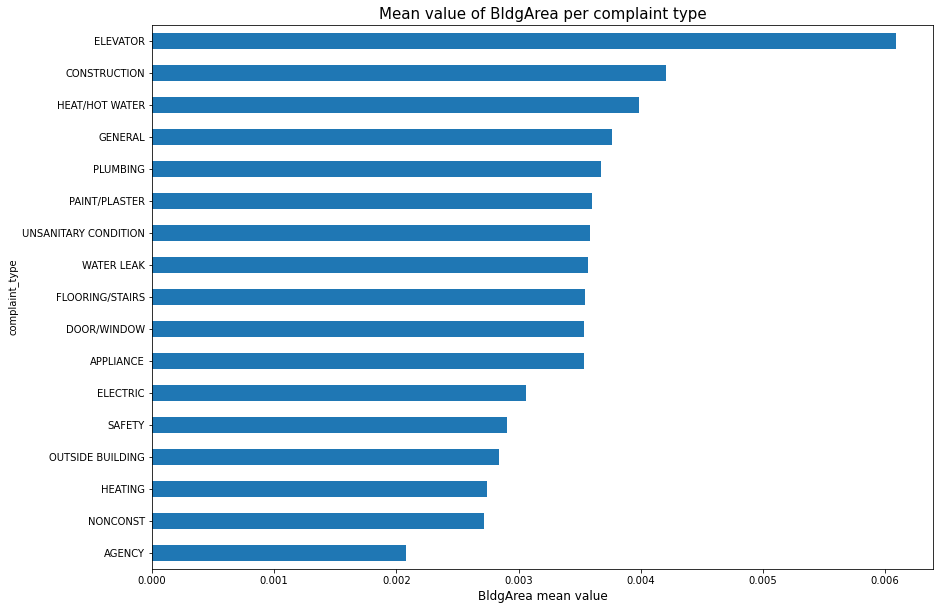

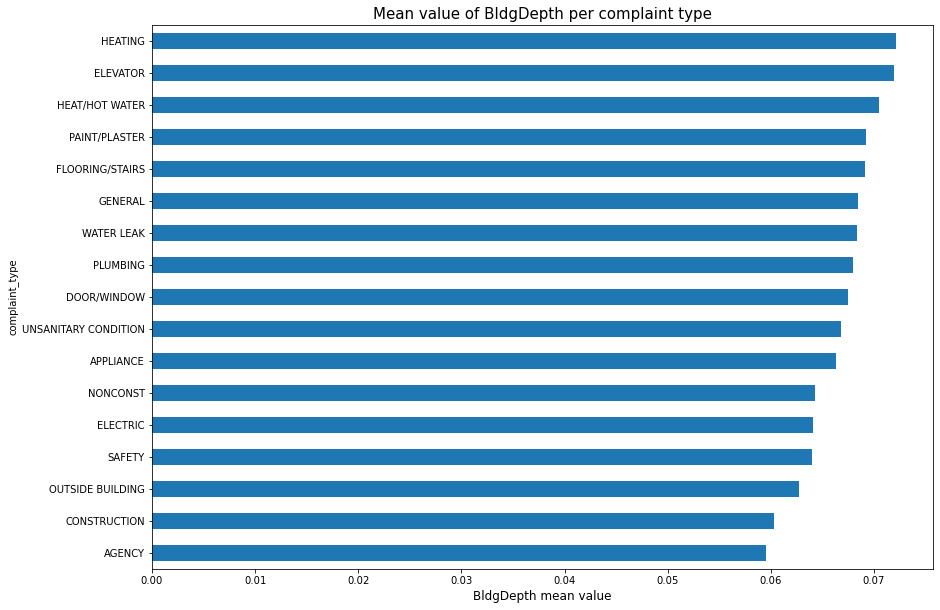

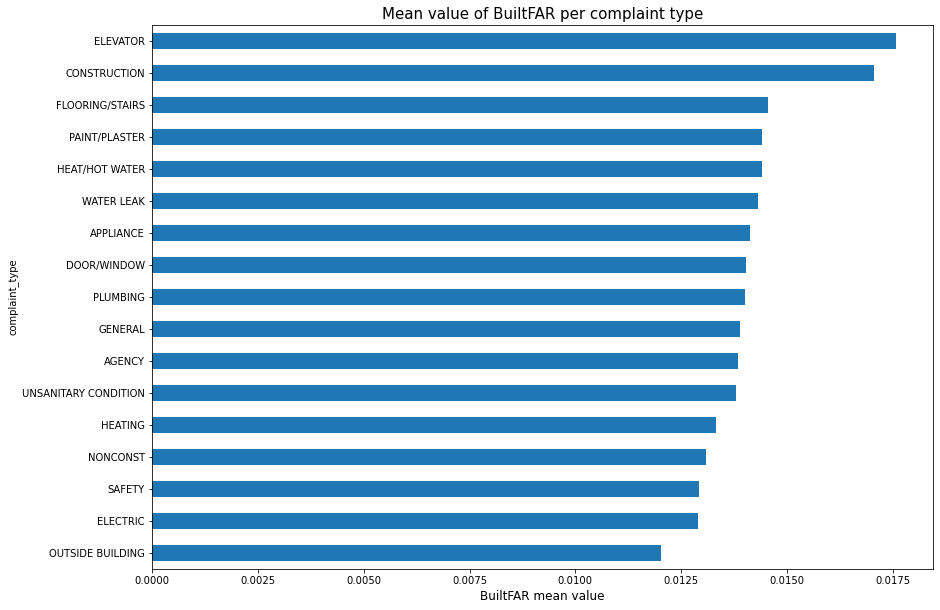

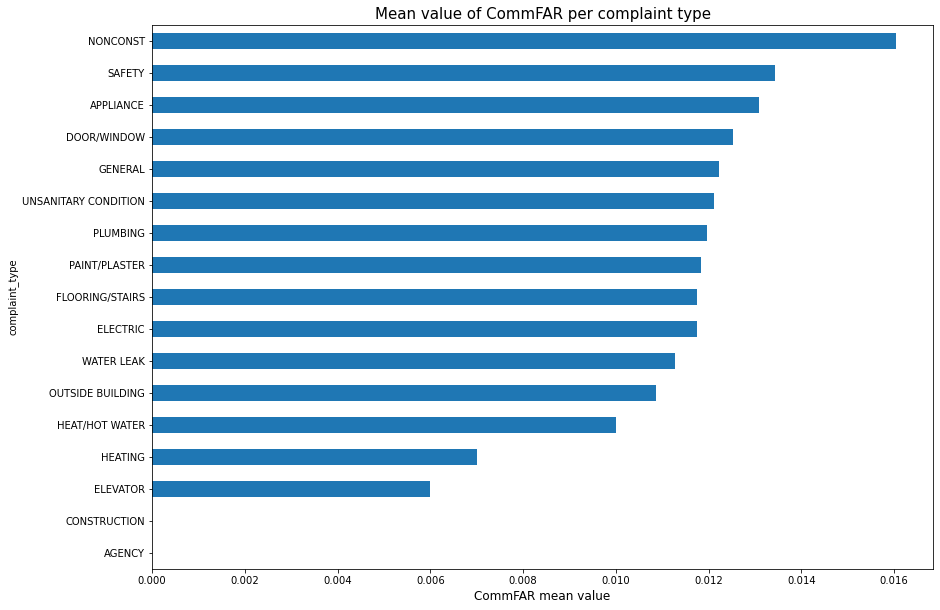

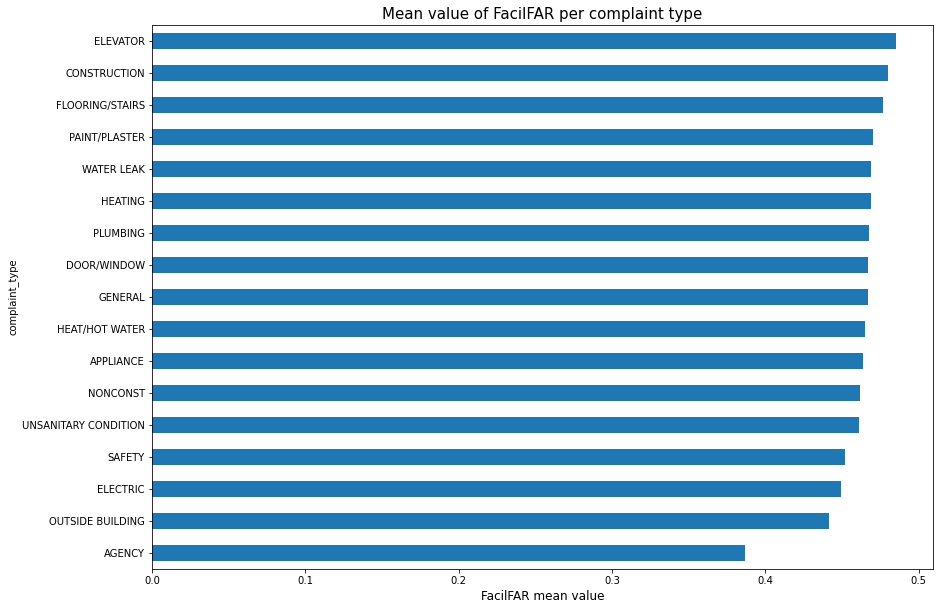

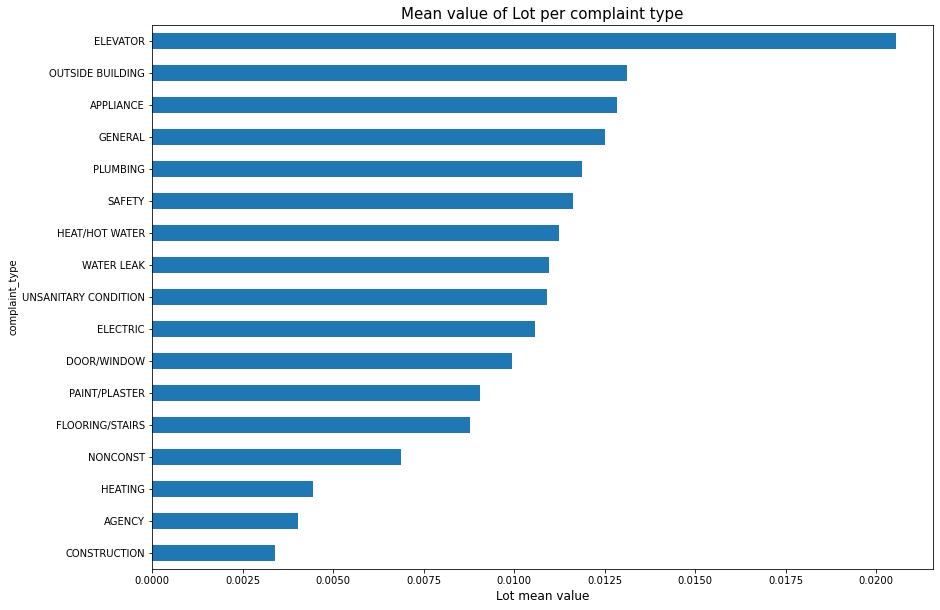

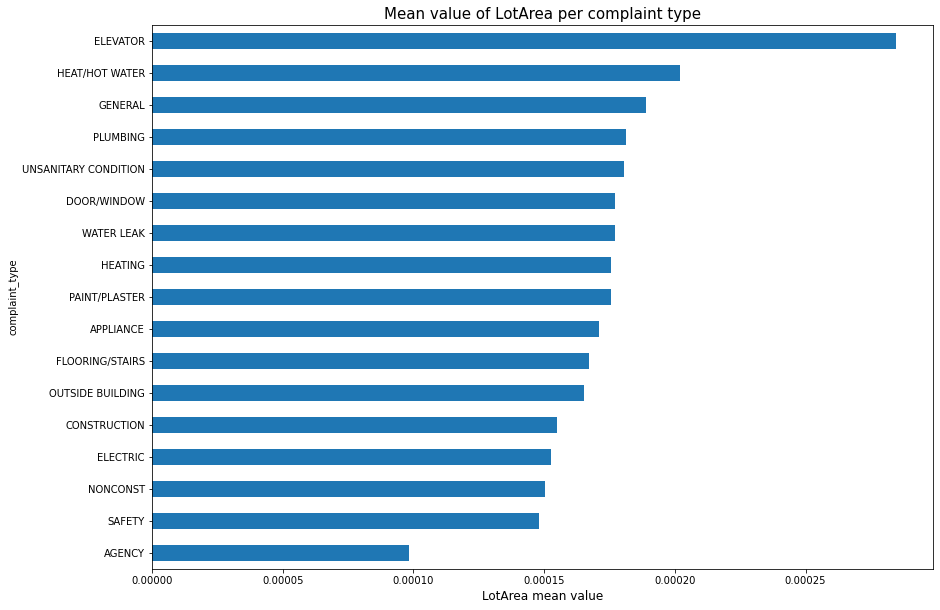

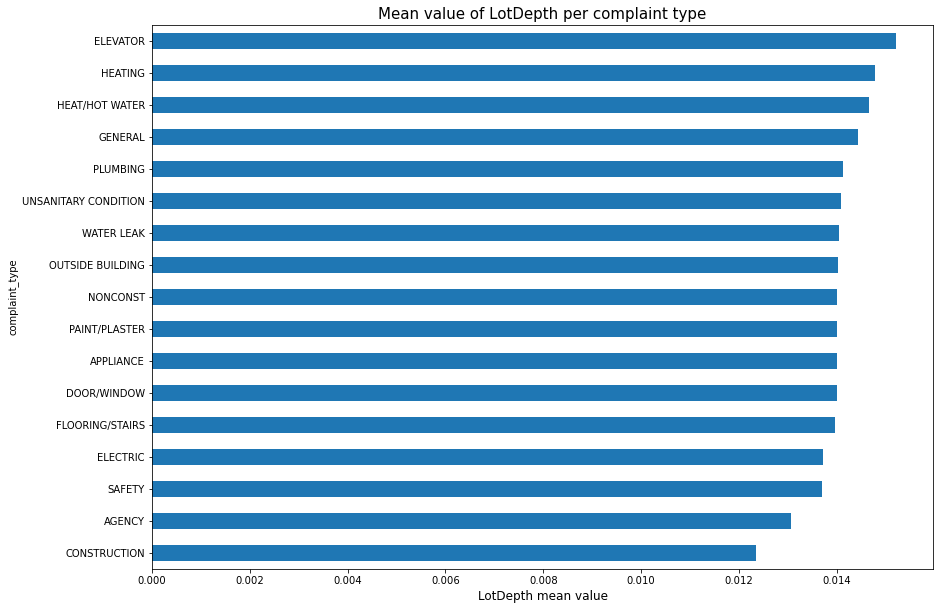

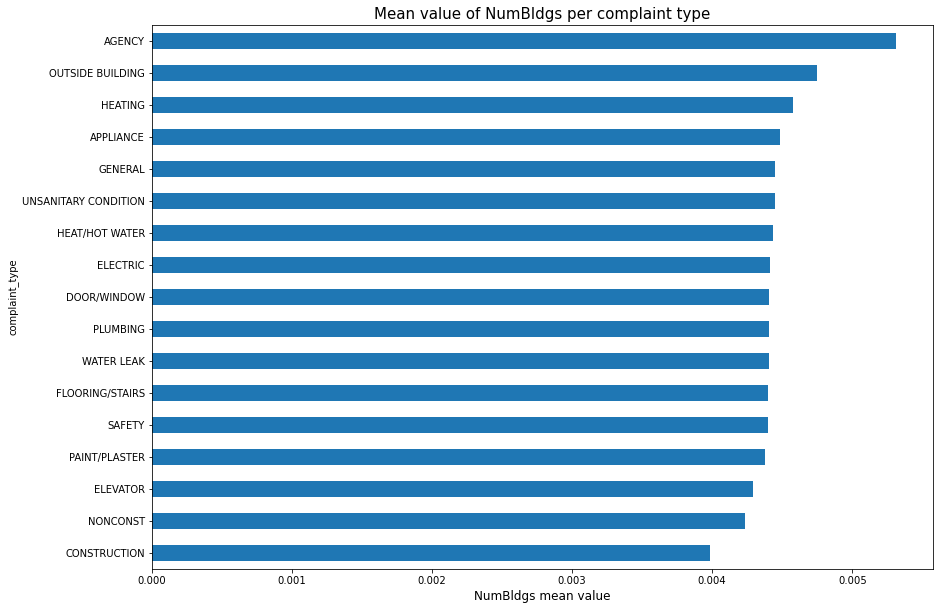

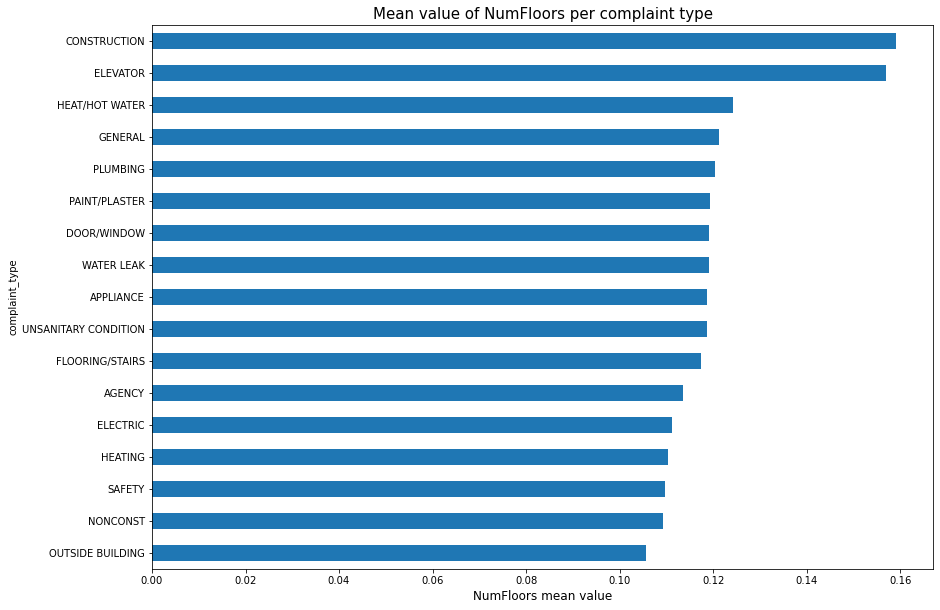

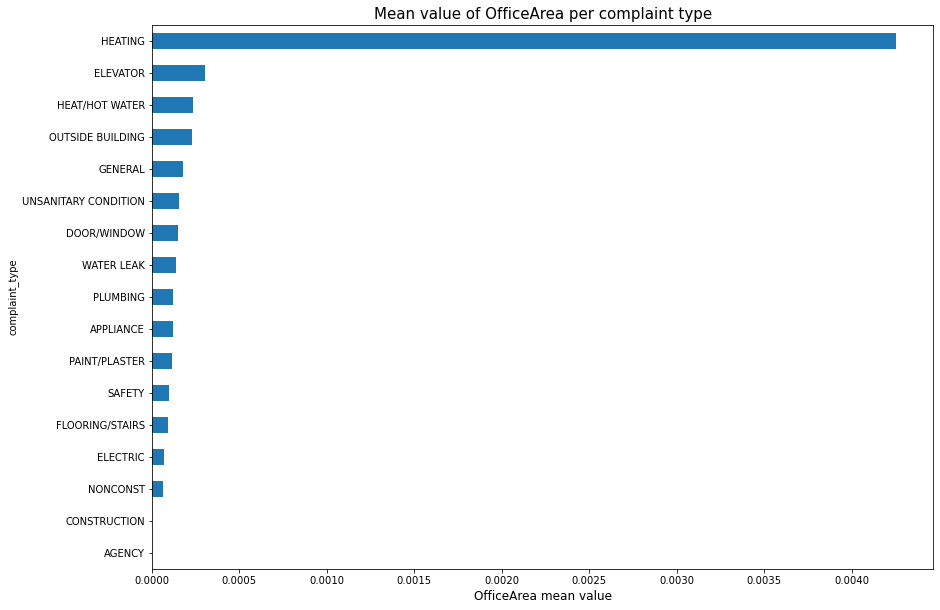

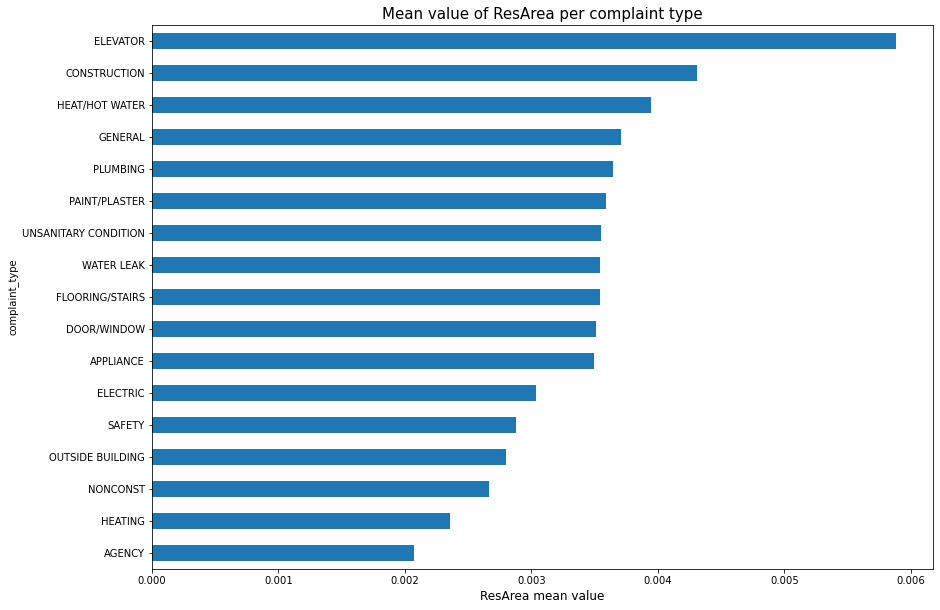

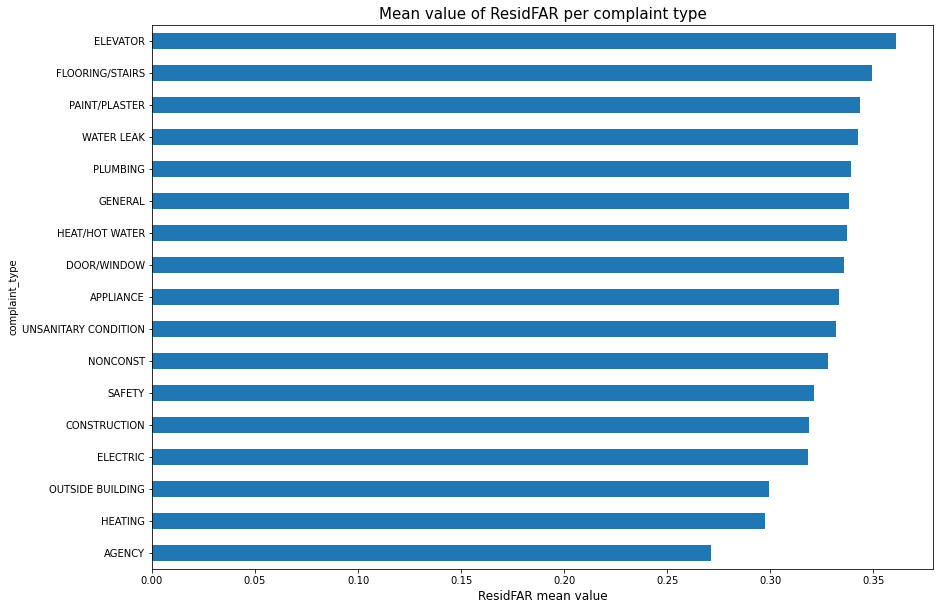

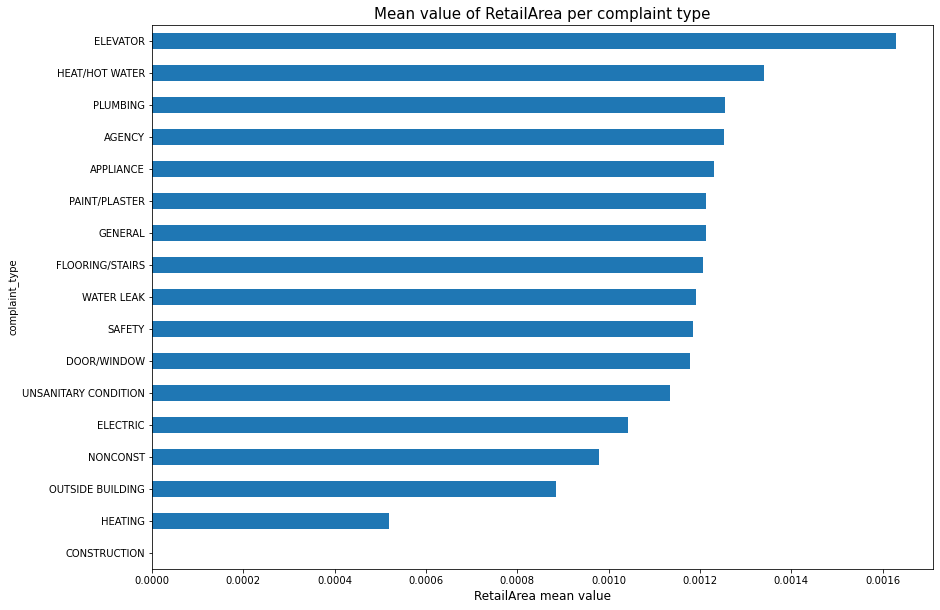

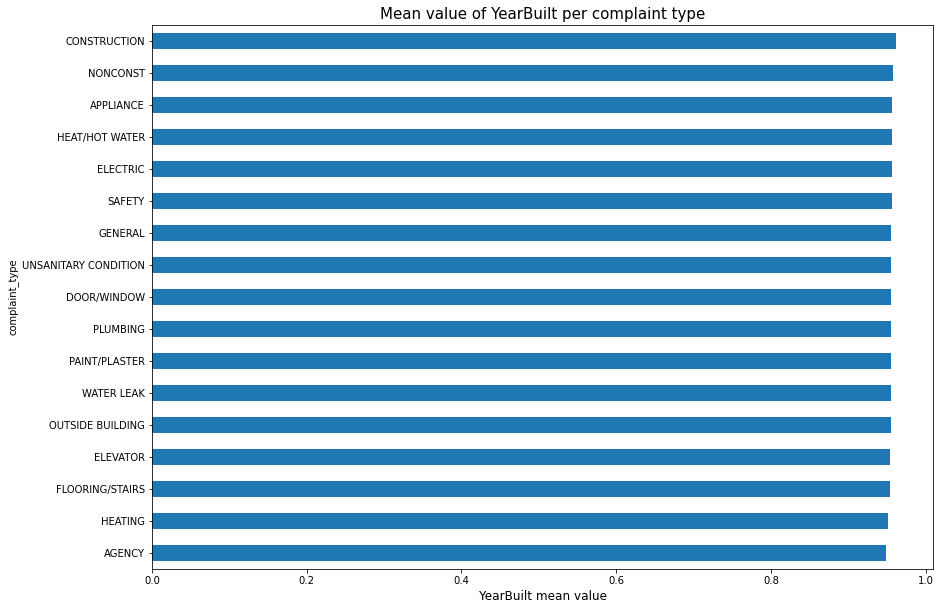

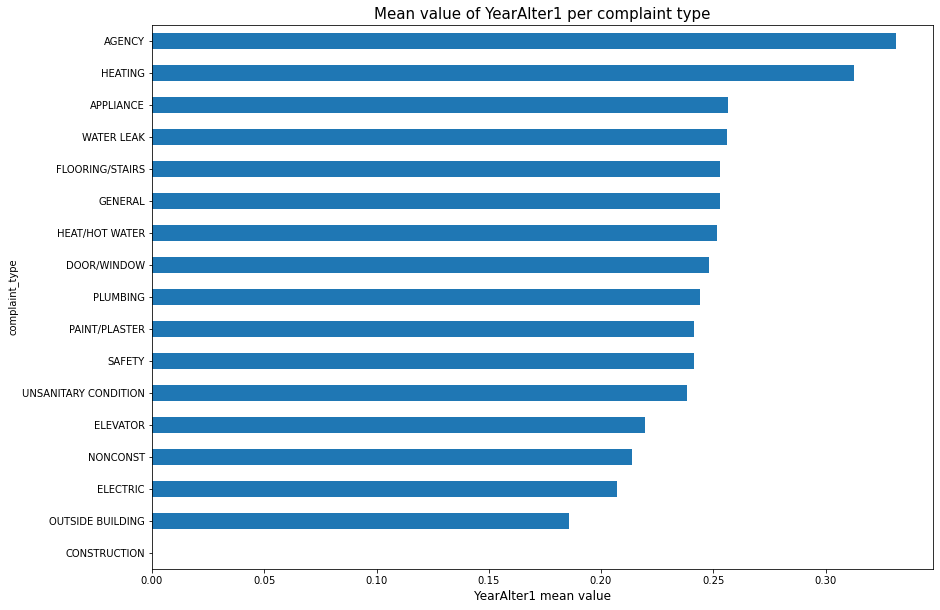

In [14]:
def barh_multi(var1):
    df_311_pluto_grouped[var1].mean().sort_values(ascending = True).plot(kind = 'barh', figsize = (14, 10))
    plt.title('Mean value of ' + var1 + ' per complaint type', size=15)
    plt.xlabel((var1 + ' mean value'), size= 12)
    plt.show()
    
plot_columns = ['BldgArea', 'BldgDepth', 'BuiltFAR', 
                'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 
                'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1']    

for i in plot_columns:
    barh_multi(i)

ANOVA - Analysis of Variance:

The F-test calculates the ratio of variation between groups mean, over the variation within each of the sample groups.

* **Large F** implies **strong correlation**, usually **F>1** is a decent value.

The p-value shows whether the obtained result is statistically significant.

* **Small p** implies **strong confidence**, usually **p<0.05** is a decent value. 

In [42]:
#basic anova function found on stackoverflow/github
def anova(var2):
    f_val, p_val = stats.f_oneway(df_311_pluto_grouped.get_group('AGENCY')[var2], 
                                  df_311_pluto_grouped.get_group('APPLIANCE')[var2],
                                  df_311_pluto_grouped.get_group('DOOR/WINDOW')[var2], 
                                  df_311_pluto_grouped.get_group('ELECTRIC')[var2], 
                                  df_311_pluto_grouped.get_group('ELEVATOR')[var2], 
                                  df_311_pluto_grouped.get_group('FLOORING/STAIRS')[var2], 
                                  df_311_pluto_grouped.get_group('GENERAL')[var2], 
                                  df_311_pluto_grouped.get_group('HEAT/HOT WATER')[var2],
                                  df_311_pluto_grouped.get_group('HEATING')[var2], 
                                  df_311_pluto_grouped.get_group('NONCONST')[var2],
                                  df_311_pluto_grouped.get_group('OUTSIDE BUILDING')[var2], 
                                  df_311_pluto_grouped.get_group('PAINT/PLASTER')[var2], 
                                  df_311_pluto_grouped.get_group('PLUMBING')[var2], 
                                  df_311_pluto_grouped.get_group('SAFETY')[var2],
                                  df_311_pluto_grouped.get_group('UNSANITARY CONDITION')[var2], 
                                  df_311_pluto_grouped.get_group('WATER LEAK')[var2])
    
    print(var2, "ANOVA results: F=", f_val, ", P =", p_val)
    return f_val, p_val

#initializing for loop
f_scores= [None] * len(plot_columns)
p_scores= [None] * len(plot_columns)
t=0   

for k in plot_columns:
    f_val, p_val = anova(k)
    f_scores[t] = f_val
    p_scores[t] = p_val
    t += 1


BldgArea ANOVA results: F= 182.46566805657432 , P = 0.0
BldgDepth ANOVA results: F= 278.81118067729926 , P = 0.0
BuiltFAR ANOVA results: F= 88.2661803091904 , P = 5.79699919932068e-273
CommFAR ANOVA results: F= 18.771666353145992 , P = 3.792675431949905e-51
FacilFAR ANOVA results: F= 87.79387933163903 , P = 1.9246097010379035e-271
Lot ANOVA results: F= 17.008695723404355 , P = 1.105358940882834e-45
LotArea ANOVA results: F= 86.77949803111201 , P = 3.5573136347562164e-268
LotDepth ANOVA results: F= 197.42106666647805 , P = 0.0
NumBldgs ANOVA results: F= 4.623432893962488 , P = 5.831706477875779e-09
NumFloors ANOVA results: F= 351.77072646975574 , P = 0.0
OfficeArea ANOVA results: F= 19.252311926231023 , P = 1.2153080940597365e-52
ResArea ANOVA results: F= 172.94626123484605 , P = 0.0
ResidFAR ANOVA results: F= 101.83169048372206 , P = 1.1125637e-316
RetailArea ANOVA results: F= 30.502071089495363 , P = 5.589969599484796e-88
YearBuilt ANOVA results: F= 13.150900687411601 , P = 7.70772937

In [54]:
d_scores = {'House_Feature': plot_columns, 'F_score': f_scores, 'p_value': p_scores}
df_scores = pd.DataFrame(data=d_scores)
print(df_scores)


   House_Feature     F_score        p_value
0       BldgArea  182.465668   0.000000e+00
1      BldgDepth  278.811181   0.000000e+00
2       BuiltFAR   88.266180  5.796999e-273
3        CommFAR   18.771666   3.792675e-51
4       FacilFAR   87.793879  1.924610e-271
5            Lot   17.008696   1.105359e-45
6        LotArea   86.779498  3.557314e-268
7       LotDepth  197.421067   0.000000e+00
8       NumBldgs    4.623433   5.831706e-09
9      NumFloors  351.770726   0.000000e+00
10    OfficeArea   19.252312   1.215308e-52
11       ResArea  172.946261   0.000000e+00
12      ResidFAR  101.831690  1.112564e-316
13    RetailArea   30.502071   5.589970e-88
14     YearBuilt   13.150901   7.707729e-34
15    YearAlter1   37.669122  1.019721e-110


# Conclusion

There is a correlation between complaint type and all building features, ordered by F-score below:

In [53]:
df_scores.sort_values(by='F_score', ascending=False)

,House_Feature,F_score,p_value
9,NumFloors,351.770726,0.000000e+00
1,BldgDepth,278.811181,0.000000e+00
7,LotDepth,197.421067,0.000000e+00
0,BldgArea,182.465668,0.000000e+00
11,ResArea,172.946261,0.000000e+00
12,ResidFAR,101.831690,1.112564e-316
2,BuiltFAR,88.266180,5.796999e-273
4,FacilFAR,87.793879,1.924610e-271
6,LotArea,86.779498,3.557314e-268
15,YearAlter1,37.669122,1.019721e-110
